In [10]:
import pandas as pd
import json
import requests
# get the response from the query
response = requests.get("https://www.footballwebpages.co.uk/league-table.json?comp=1&show=pos,w,d,l,pts")
# load the json-format data
data_json = json.loads(response.text)

In [11]:
# create a Pandas dataframe of the league table
df = pd.DataFrame(data_json['leagueTable']['team'])
# cast position/won/drawn/lost/points to int
df['position'] = df['position'].astype(int)
df['points'] = df['points'].astype(int)
df['won'] = df['won'].astype(int)
df['drawn'] = df['drawn'].astype(int)
df['lost'] = df['lost'].astype(int)
# index on position
df = df.set_index('position')
# reorder the columns
df = df[['name','won','drawn','lost','points']]
# output the dataframe, ordered on points, high to low
df.sort_values(by='points', ascending=False)

,name,won,drawn,lost,points
position,,,,,
1,Liverpool,8,3,0,27
2,Manchester City,8,2,0,26
3,Chelsea,7,3,0,24
4,Arsenal,7,2,2,23
5,Tottenham Hotspur,7,0,3,21
6,AFC Bournemouth,6,2,3,20
7,Manchester United,6,2,3,20
8,Watford,6,1,4,19
9,Everton,5,3,3,18


In [12]:
# Order alphabetically on club name
df.sort_values(by='name')

,name,won,drawn,lost,points
position,,,,,
6,AFC Bournemouth,6,2,3,20
4,Arsenal,7,2,2,23
12,Brighton & Hove Albion,4,2,5,14
15,Burnley,2,2,7,8
18,Cardiff City,1,2,8,5
3,Chelsea,7,3,0,24
14,Crystal Palace,2,2,6,8
9,Everton,5,3,3,18
19,Fulham,1,2,7,5


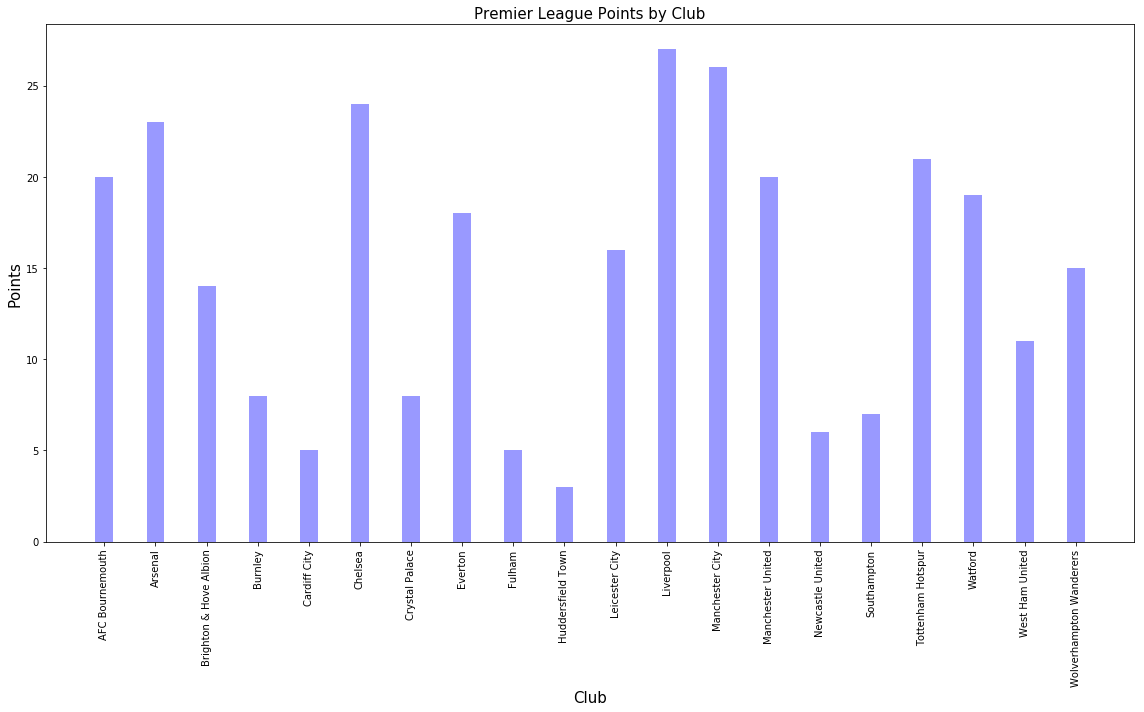

In [13]:
import matplotlib.pyplot as plt

# Set figure width to 16 and height to 10 (only required for jupyter notebooks)
fig_size = [16,10]
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

bar_width = 0.35
opacity = 0.4

rects1 = ax.bar(df['name'], df['points'], bar_width,
                alpha=opacity, color='b',
                label='Premier League Points')

plt.xticks(rotation='vertical')

ax.set_xlabel('Club', fontsize=15, )
ax.set_ylabel('Points', fontsize=15)
ax.set_title('Premier League Points by Club', fontsize=15)

fig.tight_layout()
plt.show()